<h1>Heart Disease Prediction</h1>

<h2>Sanskar Maharana
TechnoHacks Task 2</h2>

<img src = "Image.jpg" width = "500" height = "500">

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'Heart Disease Prediction.ipynb', 'heart_disease.csv', 'Image.jpg']


In [2]:
# Loading the dataset
df = pd.read_csv('heart_disease.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.shape

(303, 14)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Finding the null values present in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h3>So there are no Null values present in our dataset</h3>

In [10]:
# Checking for any duplicate values present in our dataset
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h3>So there are no duplicate values present in our data</h3>

<h4>Presenting our columns in a better way to view them.</h4>

In [11]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [12]:
# Analysing the "target" variable

In [13]:
df["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [14]:
df["target"].unique()

array([1, 0], dtype=int64)

<b>This is a classification problem, with the target variable having values '0' and '1'</b>

<h3>Checking correlation between columns</h3>

In [15]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


<h4>This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.</h4>

<h2>Exploratory Data Analysis (EDA)</h2>

1    165
0    138
Name: target, dtype: int64


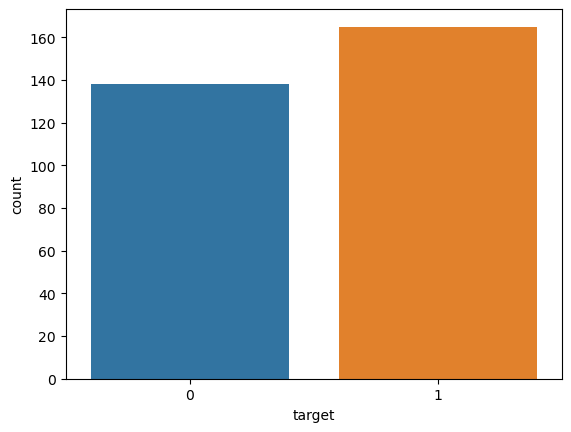

In [16]:
y = df["target"]

sns.countplot(y)


target_1 = df.target.value_counts()

print(target_1)

In [17]:
count_No_Disease = len(df[df.target == 0])
count_Have_Disease = len(df[df.target == 1])

In [18]:
print(count_No_Disease)
print(count_Have_Disease)

138
165


In [19]:
print("Percentage of patience without heart problems: "+str(round(target_1[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_1[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


<h3>We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features</h3>

<h4>Analysing the 'Sex' feature</h4>

In [20]:
df["sex"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='target'>

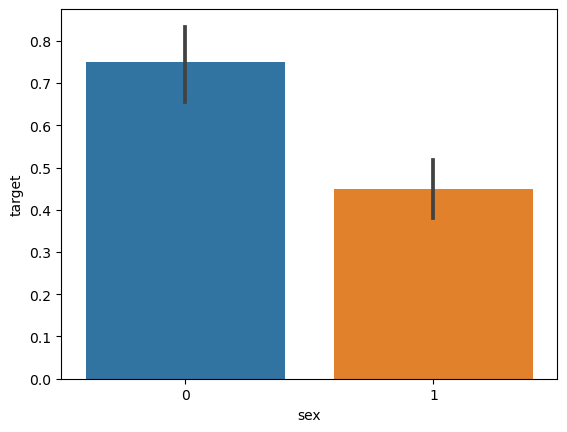

In [21]:
sns.barplot(df["sex"],y)

<h4>Females are more likely to have heart problems than males</h4>

<h3>Analysing the 'Chest Pain Type' feature</h3>

In [22]:
df["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='cp', ylabel='target'>

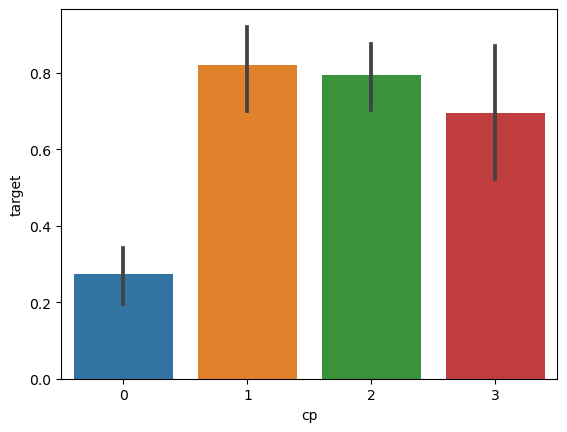

In [23]:
sns.barplot(df["cp"],y)

<h4>Chest pain of '0' (typical angina) are much less likely to have heart problems in comparision with others.</h4>

<h3>Analysing the FBS feature</h3>

In [24]:
df["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [25]:
df["fbs"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

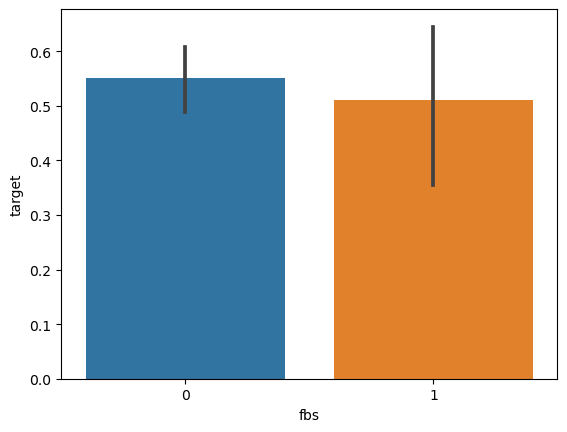

In [26]:
sns.barplot(df["fbs"], y)

<h4>Both are nearly equal so no much changes seen here.</h4>

<h3>Analysing the restecg feature</h3>

In [27]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [28]:
df['restecg'].describe()

count    303.000000
mean       0.528053
std        0.525860
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: restecg, dtype: float64

<AxesSubplot:xlabel='restecg', ylabel='target'>

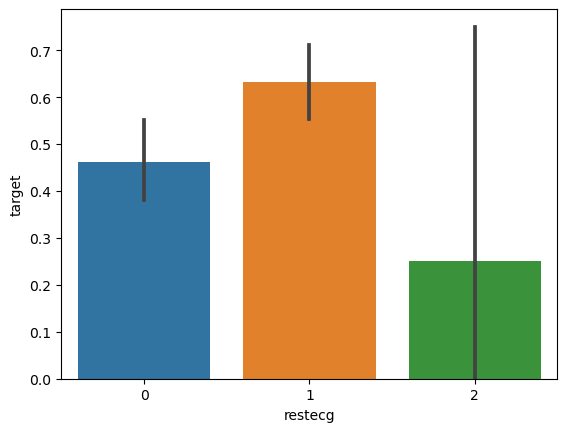

In [29]:
sns.barplot(df['restecg'],y)

<h4>People with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'</h4>

<h3>Analyzing the 'exang' feature</h3>

In [30]:
df['exang'].describe()

count    303.000000
mean       0.326733
std        0.469794
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exang, dtype: float64

In [31]:
df['exang'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

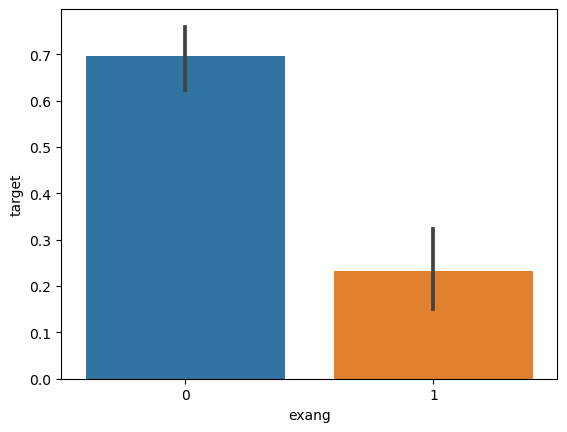

In [32]:
sns.barplot(df['exang'],y)

<h4>People with exang=1 (Exercise induced angina) are much less likely to have heart problems</h4>

<h3>Analyzing the 'slope' feature</h3>

In [33]:
df['slope'].describe()

count    303.000000
mean       1.399340
std        0.616226
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64

In [34]:
df['slope'].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

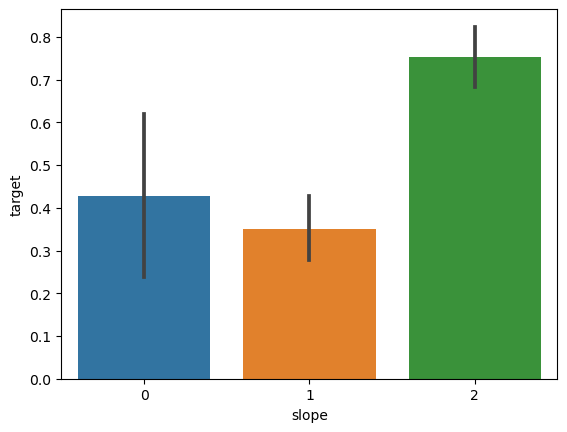

In [35]:
sns.barplot(df['slope'],y)

<h4>Slope '2' causes heart pain much more than Slope '0' and '1'</h4>

<h3>Analyzing the 'ca' feature</h3>

In [36]:
df['ca'].describe()

count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64

In [37]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

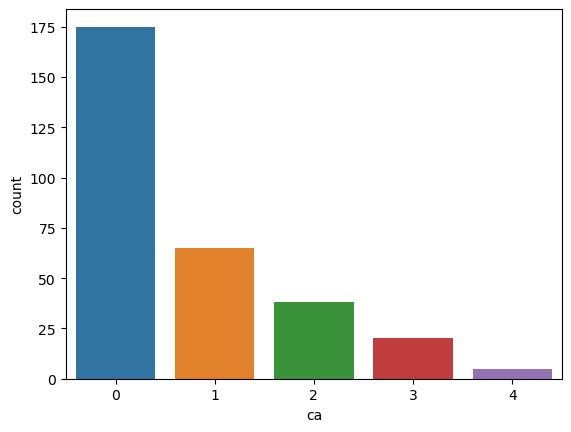

In [38]:
sns.countplot(df["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

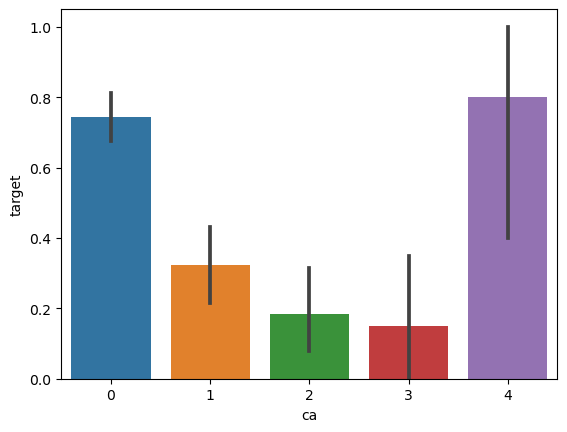

In [39]:
sns.barplot(df['ca'],y)

<h4>ca=4 has large number of heart patients</h4>

<h3>Analysing the 'thal' feature</h3>

In [40]:
df['thal'].describe()

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64

In [41]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

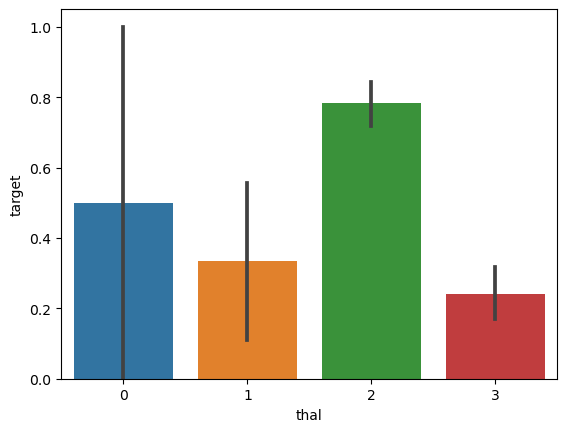

In [42]:
sns.barplot(df['thal'],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

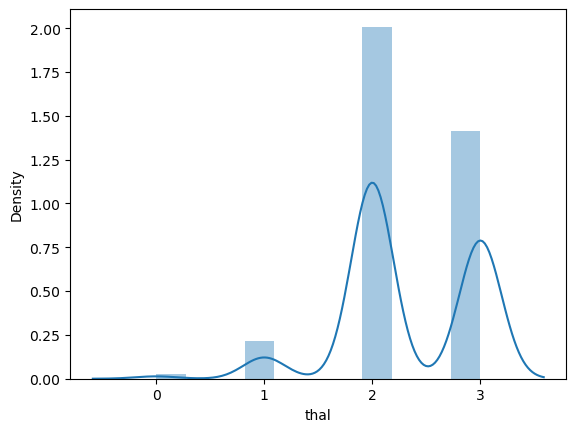

In [43]:
sns.distplot(df['thal'])

# Train Test Splitting

In [44]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [45]:
X_train.shape

(242, 13)

In [46]:
X_test.shape

(61, 13)

In [47]:
Y_train.shape

(242,)

In [48]:
Y_test.shape

(61,)

# Model Fitting

In [49]:
from sklearn.metrics import accuracy_score

<h3>Logistic Regression</h3>

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [51]:
Y_pred_lr.shape

(61,)

In [52]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


<h3>Naive Bayes</h3>

In [53]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [54]:
Y_pred_nb.shape

(61,)

In [55]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


<h3>SVM</h3>

In [56]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [57]:
Y_pred_svm.shape

(61,)

In [58]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


<h3>K Nearest Neighbor</h3>

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [60]:
Y_pred_knn.shape

(61,)

In [61]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


<h3>Decision Tree</h3>

In [62]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [63]:
print(Y_pred_dt.shape)

(61,)


In [64]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


<h3>Random Forest</h3>

In [65]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [66]:
Y_pred_rf.shape

(61,)

In [67]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


<h3>XGBOOST</h3>

In [68]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [69]:
Y_pred_xgb.shape

(61,)

In [70]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


<h3>Neural Network</h3>

In [71]:
from keras.models import Sequential
from keras.layers import Dense

In [72]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [73]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 3ms/step - loss: 40.1664 - accuracy: 0.4587
Epoch 2/300
8/8 [==============================] - 0s 2ms/step - loss: 32.3246 - accuracy: 0.4628
Epoch 3/300
8/8 [==============================] - 0s 2ms/step - loss: 24.3595 - accuracy: 0.4380
Epoch 4/300
8/8 [==============================] - 0s 2ms/step - loss: 17.0892 - accuracy: 0.3884
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 12.6800 - accuracy: 0.3719
Epoch 6/300
8/8 [==============================] - 0s 2ms/step - loss: 11.2761 - accuracy: 0.3554
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 11.2839 - accuracy: 0.3554
Epoch 8/300
8/8 [==============================] - 0s 2ms/step - loss: 10.7366 - accuracy: 0.3471
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 9.9029 - accuracy: 0.3347
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 9.4227 - accuracy: 0.3636
Epoch 11/300
8/8 [===

8/8 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7769
Epoch 85/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7893
Epoch 86/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7893
Epoch 87/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7769
Epoch 88/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7934
Epoch 89/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7851
Epoch 90/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7934
Epoch 91/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.8058
Epoch 92/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7727
Epoch 93/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7934
Epoch 94/300
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8140
Epoch 168/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8264
Epoch 169/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8223
Epoch 170/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8347
Epoch 171/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8554
Epoch 172/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8512
Epoch 173/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7975
Epoch 174/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.8140
Epoch 175/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8388
Epoch 176/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3770 - accuracy: 0.8554
Epoch 177/300
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8512
Epoch 250/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8471
Epoch 251/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.7727
Epoch 252/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8430
Epoch 253/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8347
Epoch 254/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8306
Epoch 255/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8388
Epoch 256/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8430
Epoch 257/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8554
Epoch 258/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.8430
Epoch 259/300
8/8 [=====

In [74]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [75]:
Y_pred_nn.shape

(61, 1)

In [76]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [77]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 81.97 %


<h3>O/P Final Score</h3>

In [78]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 78.69 %
The accuracy score achieved using Neural Network is: 81.97 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

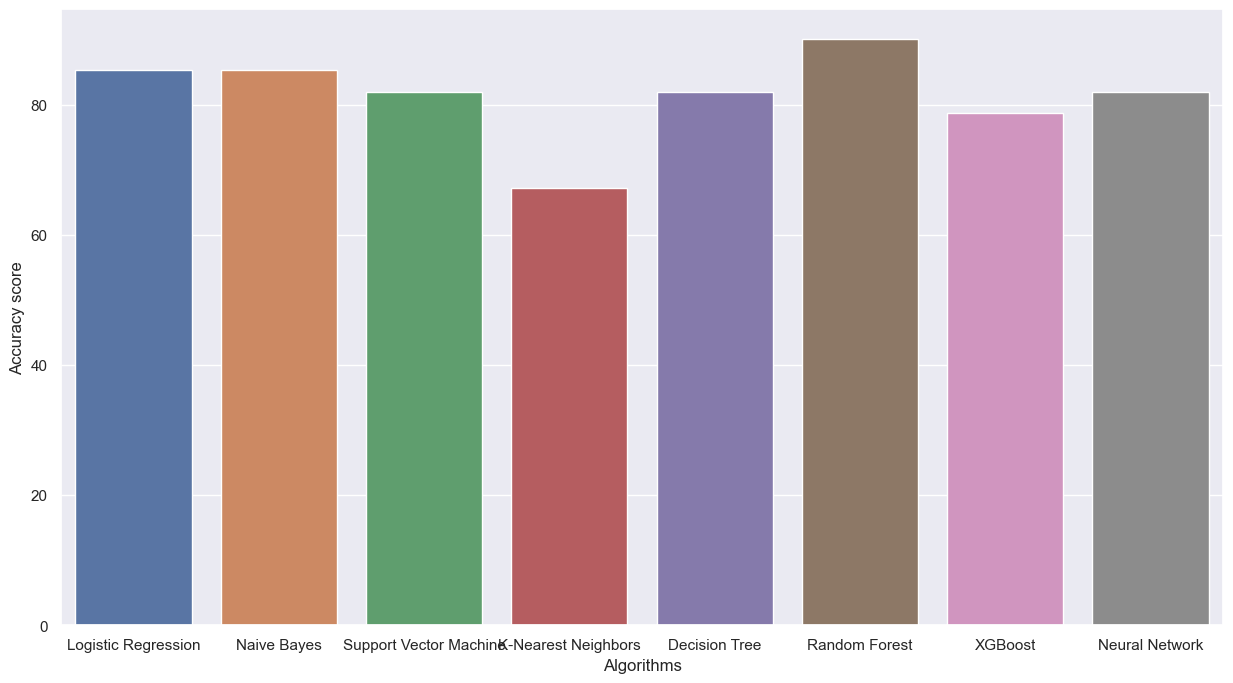

In [79]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

<h4>Here, random forest has good result as compared to other algorithms</h4>

<h4>So, We use Random Forest Machine Learning Model.</h4>